## Decision Tree Classification of Restaurant with Customer Gender Labeling

### Introduction

In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [0]:
resto = pd.read_csv('Static Dataset Transaction - Burger Star (Outlet A) .csv')

In [4]:
resto.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


In [5]:
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
Timestamp        312 non-null object
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
dtypes: int64(5), object(4)
memory usage: 22.0+ KB


#### Drop column Timestamp to clean the data

In [0]:
rest=resto.drop(columns=['Timestamp'])

In [7]:
rest.head()

,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,Beef burger,1,6,Mineral water,1,3,1,DANA
1,Cheese burger,3,12,Coke,2,10,0,DANA
2,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,Chicken burger,2,9,Coffe,3,9,0,DANA
4,Cheese burger,3,11,Coke,2,3,1,DANA


In [8]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
dtypes: int64(5), object(3)
memory usage: 19.6+ KB


In [9]:
rest['Type Burger'].value_counts()

Beef burger             116
Chicken burger           71
Double cheese burger     69
Cheese burger            56
Name: Type Burger, dtype: int64

In [10]:
rest['Type Drink'].value_counts()

Mineral water    109
Coffe             88
Coke              69
None              46
Name: Type Drink, dtype: int64

In [11]:
rest['Gender'].value_counts()

0    171
1    141
Name: Gender, dtype: int64

In [12]:
rest['Payment'].value_counts()

LINK AJA    67
GOPAY       65
TUNAI       64
DANA        64
OVO         52
Name: Payment, dtype: int64

### PreProcessing

#### X data

In [0]:
data=rest.drop(columns=['Code Burger', 'Code Drink', 'Gender'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
Type Burger      312 non-null object
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Amount Drink     312 non-null int64
Payment          312 non-null object
dtypes: int64(2), object(3)
memory usage: 12.3+ KB


In [15]:
x=pd.get_dummies(data)
x.head()
#rest=resto.drop(columns=['Timestamp'])

,Amount Burger,Amount Drink,Type Burger_Beef burger,Type Burger_Cheese burger,Type Burger_Chicken burger,Type Burger_Double cheese burger,Type Drink_Coffe,Type Drink_Coke,Type Drink_Mineral water,Type Drink_None,Payment_DANA,Payment_GOPAY,Payment_LINK AJA,Payment_OVO,Payment_TUNAI
0,6,3,1,0,0,0,0,0,1,0,1,0,0,0,0
1,12,10,0,1,0,0,0,1,0,0,1,0,0,0,0
2,10,5,0,0,0,1,0,0,1,0,0,0,1,0,0
3,9,9,0,0,1,0,1,0,0,0,1,0,0,0,0
4,11,3,0,1,0,0,0,1,0,0,1,0,0,0,0


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 15 columns):
Amount Burger                       312 non-null int64
Amount Drink                        312 non-null int64
Type Burger_Beef burger             312 non-null uint8
Type Burger_Cheese burger           312 non-null uint8
Type Burger_Chicken burger          312 non-null uint8
Type Burger_Double cheese burger    312 non-null uint8
Type Drink_Coffe                    312 non-null uint8
Type Drink_Coke                     312 non-null uint8
Type Drink_Mineral water            312 non-null uint8
Type Drink_None                     312 non-null uint8
Payment_DANA                        312 non-null uint8
Payment_GOPAY                       312 non-null uint8
Payment_LINK AJA                    312 non-null uint8
Payment_OVO                         312 non-null uint8
Payment_TUNAI                       312 non-null uint8
dtypes: int64(2), uint8(13)
memory usage: 8.9 KB


#### Y Data

In [17]:
y = rest["Gender"]
y[0:5]

0    1
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

### Setting Up Decision Tree

---
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [0]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [0]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

### Modelling

We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>RestoTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [20]:
RestoTree = DecisionTreeClassifier(criterion="gini", max_depth = 10)
RestoTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [21]:
RestoTree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction

Make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [0]:
predTree = RestoTree.predict(x_testset)

### Accuracy

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9680851063829787


### Visualization Tree

In [25]:
!apt-get -qq install -y graphviz && pip install -q pydotplus
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


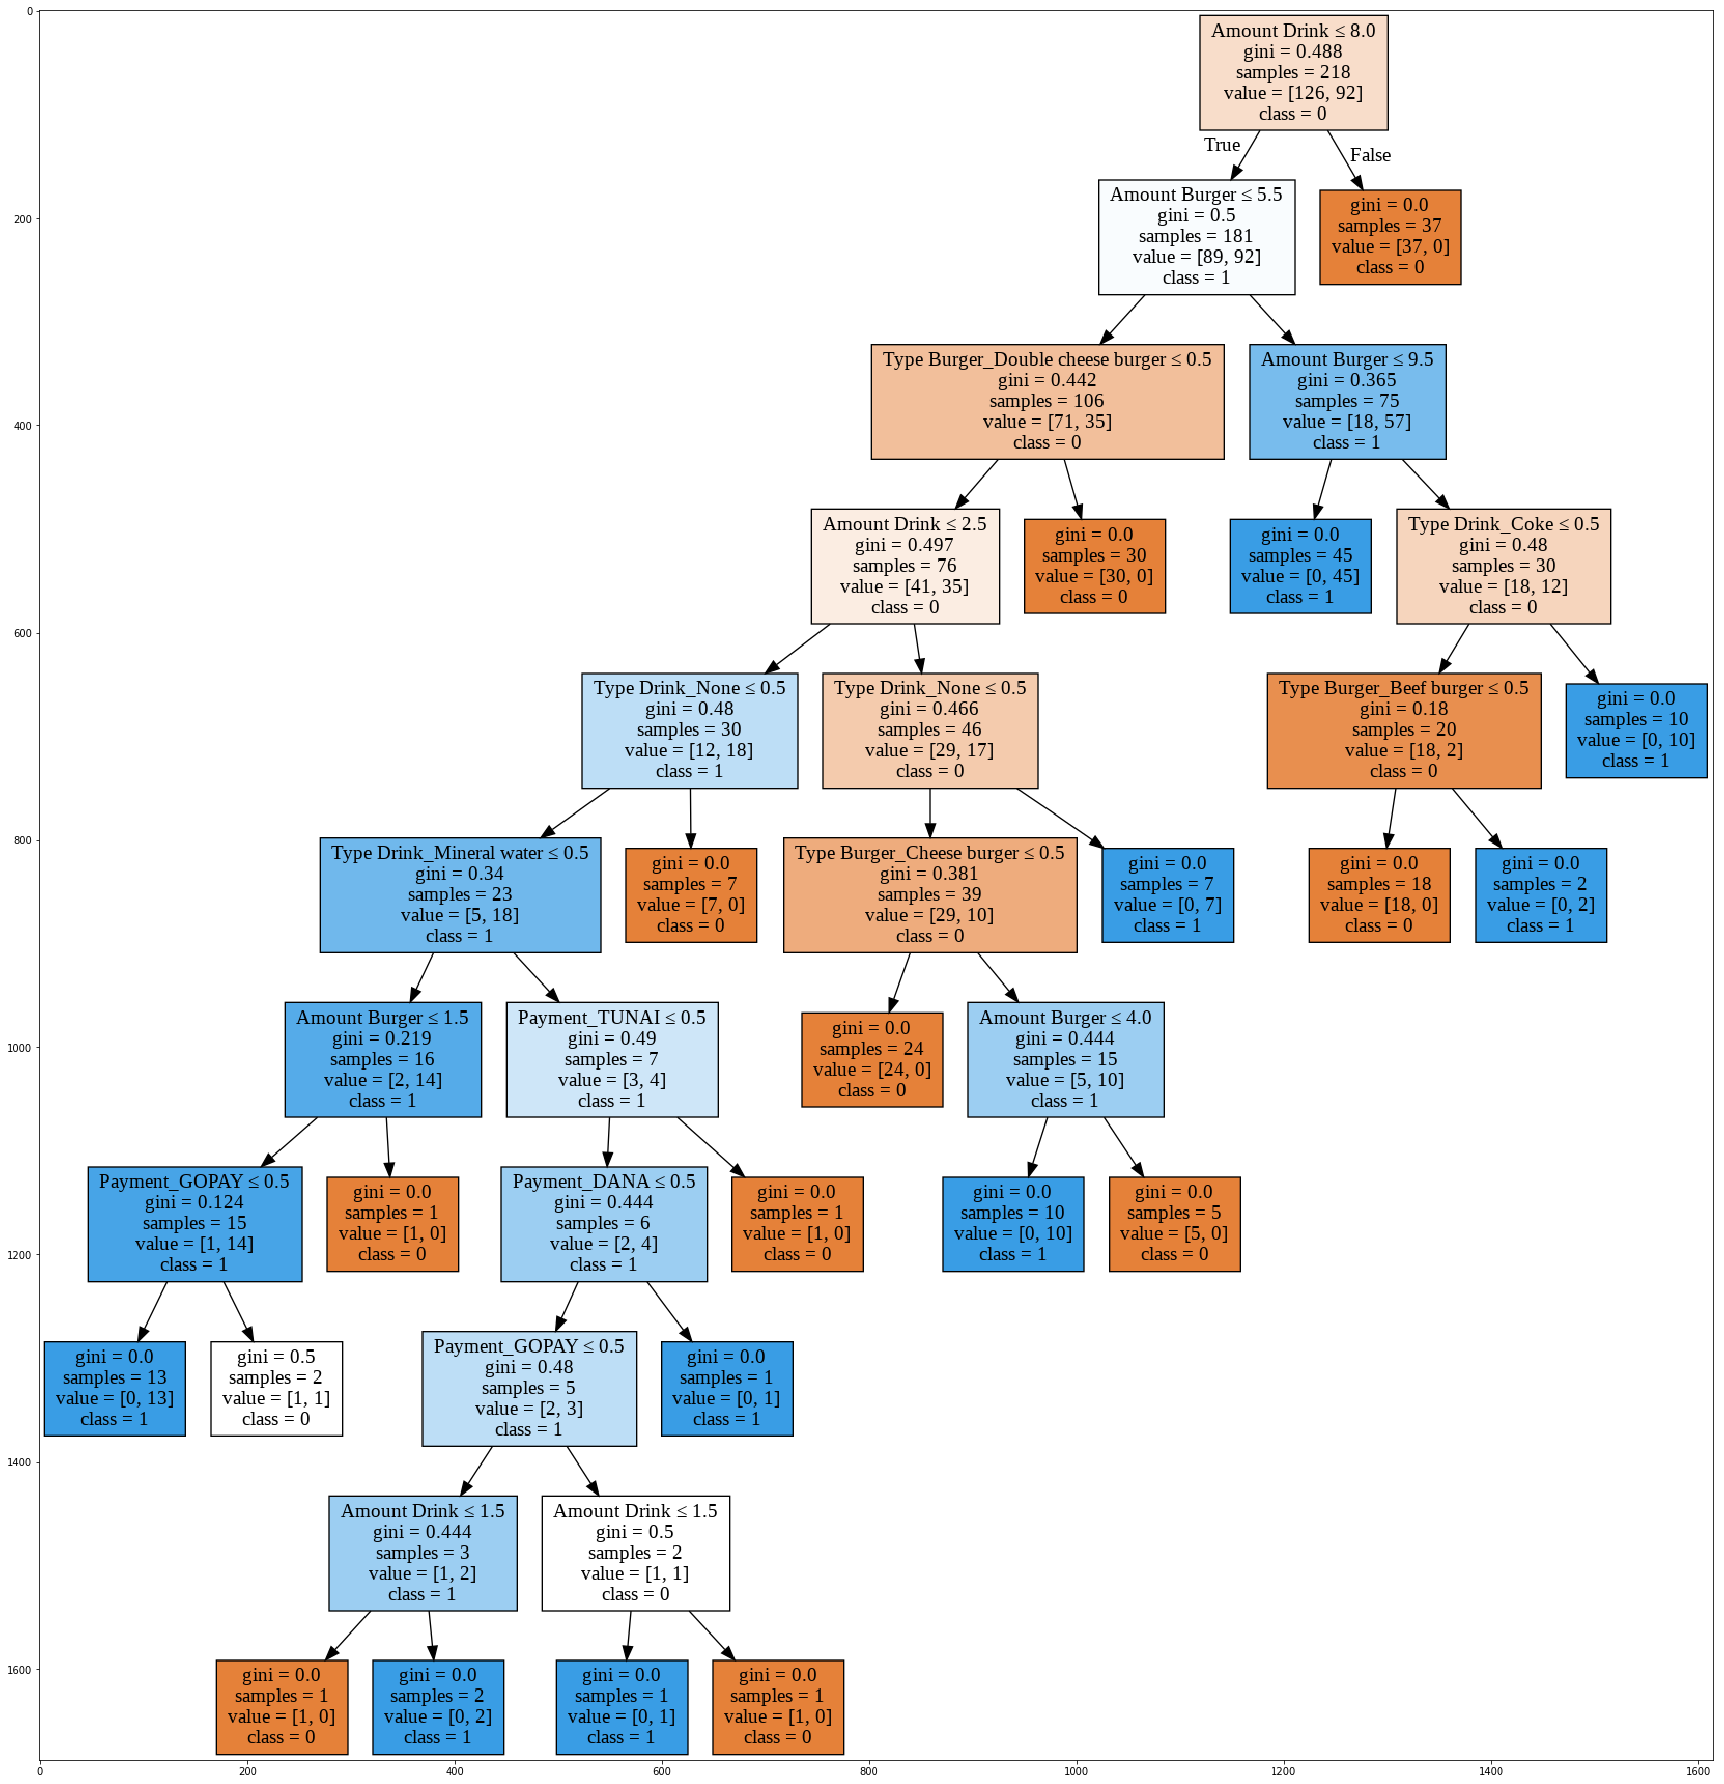

In [27]:
dot_data = StringIO()
filename = "Restotree.png"
featureNames = x.columns
targetNames = resto["Gender"].unique().tolist()

class_names = np.array([str(x) for x in np.unique(y_trainset)])

# out=tree.export_graphviz(RestoTree, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
out=tree.export_graphviz(RestoTree, out_file=dot_data, feature_names=featureNames, class_names=class_names , filled=True,  special_characters=True,rotate=False)  



graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(30, 40))
plt.imshow(img,interpolation='nearest')